In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# **INTRODUCTION**

This project is aimed to compare the feature extractors : SIFT and ORB on the same image. I use as input a woman's face. 

**WHAT DOES THE CODE BELOW DO?** After loading the input image, I transform it like this : 
- 45 degrees rotation
- Brightness increased
- Downscale to create zoomed out effect
- Adding padding to keep original dimensions for comparison

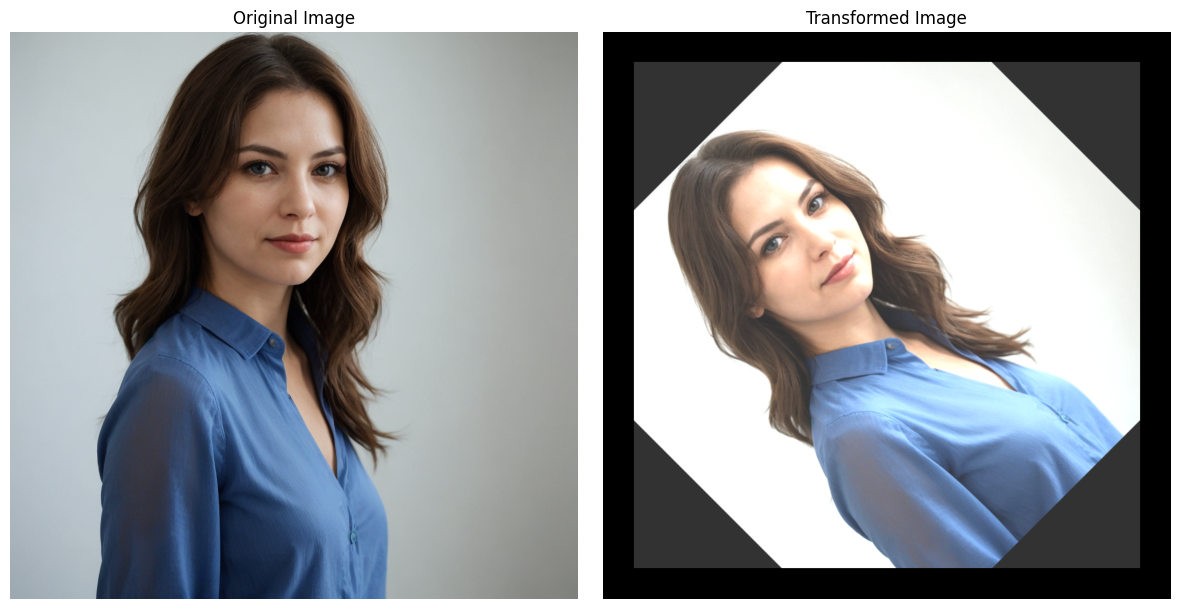

In [ ]:
img=cv2.imread('woman.png', cv2.IMREAD_COLOR)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, _ = img.shape
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1)  # Rotate by 45 degrees
rotated = cv2.warpAffine(img, M, (cols, rows))

#change brightness
bright = cv2.convertScaleAbs(rotated, alpha=1.2, beta=50)  # Increase brightness

#change scale
scaled = cv2.resize(bright, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_LINEAR)  # Scale down

#add some padding to match original size
img_transformed = cv2.copyMakeBorder(scaled, 50, 50, 50, 50, cv2.BORDER_CONSTANT, value=[0, 0, 0])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')  
axes[1].imshow(img_transformed)
axes[1].set_title("Transformed Image")
axes[1].axis('off')  
plt.tight_layout()
plt.show()



In [24]:
def match_features(img1, img2, method='SIFT'):
    """Detect and match features using SIFT or ORB."""
    if method == 'SIFT':
        feature_detector = cv2.SIFT_create()
    elif method == 'ORB':
        feature_detector = cv2.ORB_create()
    else:
        raise ValueError("Invalid method. Choose 'SIFT' or 'ORB'.")

    # Detect keypoints and descriptors
    kp1, des1 = feature_detector.detectAndCompute(img1, None)
    kp2, des2 = feature_detector.detectAndCompute(img2, None)

    # Match features using BFMatcher
    if method == 'SIFT':
        matcher = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    elif method == 'ORB':
        matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    start_time = time.time()
    matches = matcher.match(des1, des2)
    end_time = time.time()

    percentage_matches = (len(matches) / len(kp1)) * 100 if kp1 else 0

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    return kp1, kp2, matches, percentage_matches, end_time - start_time     

In [25]:
def plot_matches(img1, kp1, img2, kp2, matches, method):
    """Visualize matched features."""
    match_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(15, 10))
    plt.title(f"Feature Matching using {method}")
    plt.imshow(cv2.cvtColor(match_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Processing with SIFT...
Total keypoints in Image 1: 336
Total keypoints in Image 2: 402
Number of matches: 201
Percentage of matches: 59.82%
Computation time: 0.0020 seconds


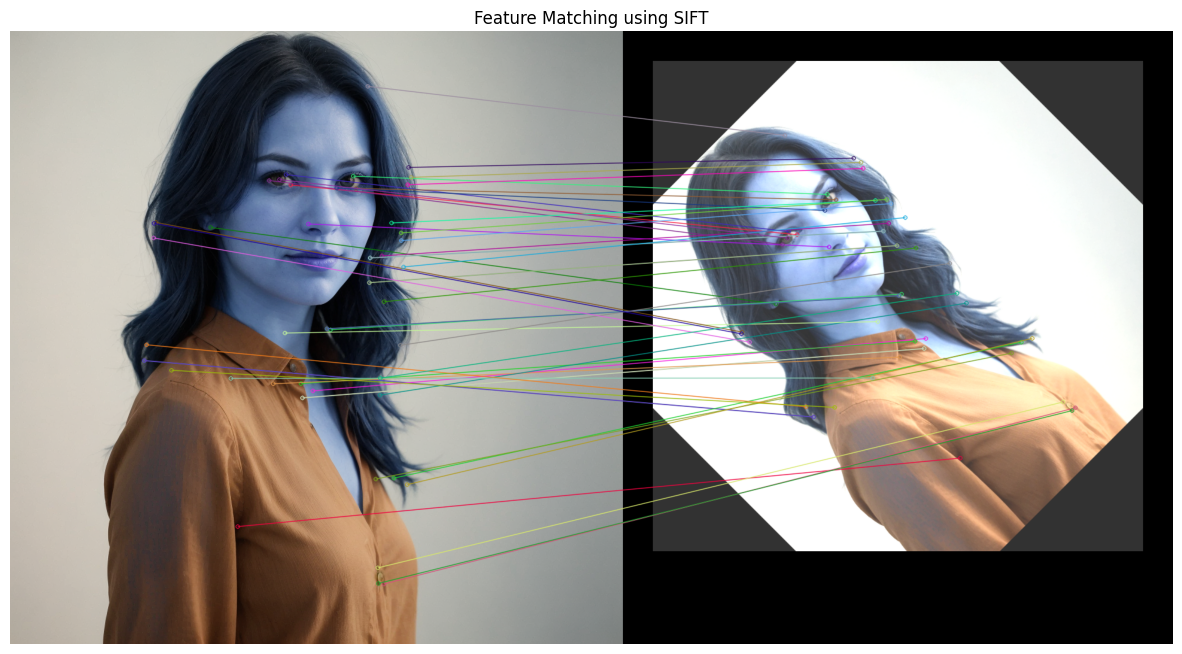


Processing with ORB...
Total keypoints in Image 1: 500
Total keypoints in Image 2: 500
Number of matches: 225
Percentage of matches: 45.00%
Computation time: 0.0010 seconds


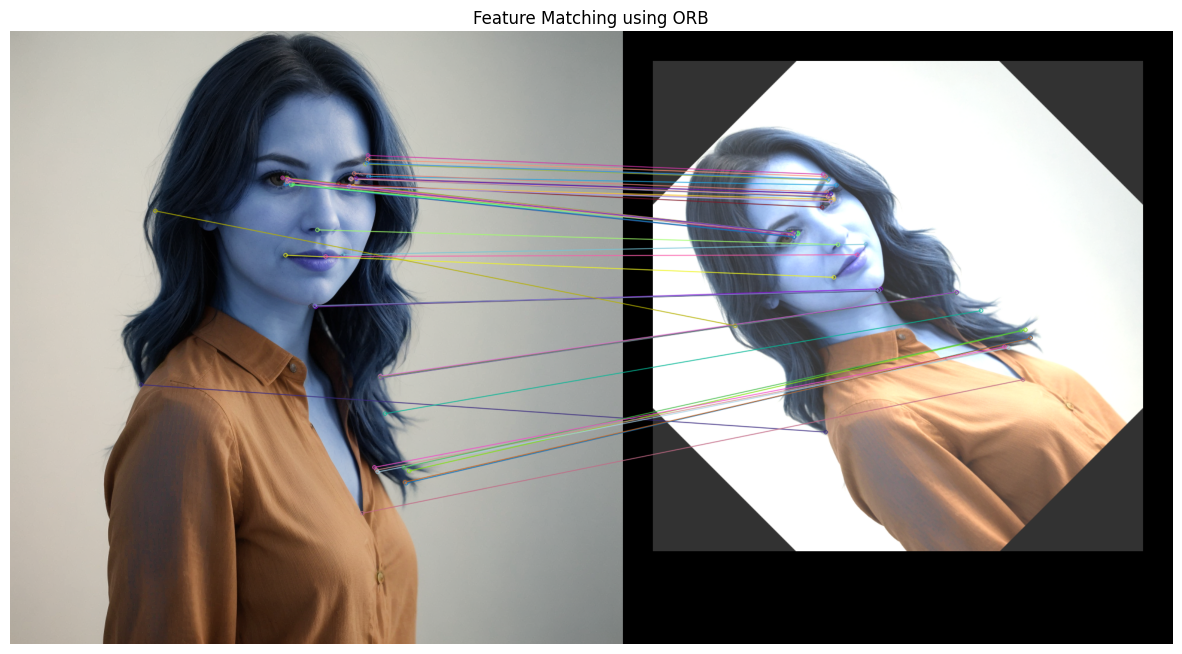

In [26]:
for method in ['SIFT', 'ORB']:
        print(f"\nProcessing with {method}...")
        kp1, kp2, matches, percentage_matches, computation_time = match_features(img, img_transformed, method=method)
        print(f"Total keypoints in Image 1: {len(kp1)}")
        print(f"Total keypoints in Image 2: {len(kp2)}")
        print(f"Number of matches: {len(matches)}")
        print(f"Percentage of matches: {percentage_matches:.2f}%")
        print(f"Computation time: {computation_time:.4f} seconds")

        # Visualize matches
        plot_matches(img, kp1, img_transformed, kp2, matches, method)
